In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#修改matplotlib font配置，不讓圖例出現中文亂碼
#https://www.zhihu.com/question/25404709

tra_df = pd.read_csv("traffic_accident.csv", encoding="big5")
tra_df.head()

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,受傷人數,當事人序,車種,性別,年齡,受傷程度,天候,速限,道路型態,事故位置
0,104,1,1,0,18,2,08士林區,東山路25巷編號097號燈桿前,0,3,1,C03,1,19.0,2.0,8.0,30.0,15.0,9.0
1,104,1,1,0,18,2,08士林區,東山路25巷編號097號燈桿前,0,3,2,C03,1,18.0,2.0,8.0,30.0,15.0,9.0
2,104,1,1,0,18,2,08士林區,東山路25巷編號097號燈桿前,0,3,3,C03,1,19.0,3.0,8.0,30.0,15.0,9.0
3,104,1,1,0,18,2,08士林區,東山路25巷編號097號燈桿前,0,3,4,H02,2,20.0,2.0,8.0,30.0,15.0,9.0
4,104,1,1,1,37,2,10文山區,木柵路4段 秀明路,0,2,1,B03,1,51.0,3.0,8.0,50.0,4.0,1.0


In [2]:
tra_df.isnull().any()

發生年     False
發生月     False
發生日     False
發生時     False
發生分     False
處理別     False
區序      False
肇事地點    False
死亡人數    False
受傷人數    False
當事人序    False
車種       True
性別      False
年齡       True
受傷程度     True
天候       True
速限       True
道路型態     True
事故位置     True
dtype: bool

In [3]:
tra_df.dtypes

發生年       int64
發生月       int64
發生日       int64
發生時       int64
發生分       int64
處理別       int64
區序       object
肇事地點     object
死亡人數      int64
受傷人數      int64
當事人序      int64
車種       object
性別        int64
年齡      float64
受傷程度    float64
天候      float64
速限      float64
道路型態    float64
事故位置    float64
dtype: object

### Forward fill missing value

In [4]:
#pad = forward fill, bfill = backward fill 
tra_df = tra_df.fillna(method="pad")
tra_df.isnull().any()


發生年     False
發生月     False
發生日     False
發生時     False
發生分     False
處理別     False
區序      False
肇事地點    False
死亡人數    False
受傷人數    False
當事人序    False
車種      False
性別      False
年齡      False
受傷程度    False
天候      False
速限      False
道路型態    False
事故位置    False
dtype: bool

### 資料清除與選擇

In [5]:
#clean data when 性別 = 3 or 4
tra_df = tra_df[tra_df["性別"] != 3]
tra_df = tra_df[tra_df["性別"] != 4]

#clean data when 天候 = 1~5
tra_df = tra_df[tra_df["天候"] != 1]
tra_df = tra_df[tra_df["天候"] != 2]
tra_df = tra_df[tra_df["天候"] != 3]
tra_df = tra_df[tra_df["天候"] != 4]
tra_df = tra_df[tra_df["天候"] != 5]


### 減少車種分類複雜化

In [6]:
tra_df = tra_df.reset_index()
tra_df["車種類"] = "其他" 

#group 車種 column
for i in range(0, len(tra_df)):
    if tra_df["車種"][i][:1] == "A" or tra_df["車種"][i] == "D01" or tra_df["車種"][i] == "D02":
        tra_df.ix[i,"車種類"] = "大客車"
    elif tra_df["車種"][i][:1] == "B" or tra_df["車種"][i] == "D03":
        tra_df.ix[i,"車種類"] = "小型車"
    elif tra_df["車種"][i][:1] == "C":
        tra_df.ix[i,"車種類"] = "機車"
    elif tra_df["車種"][i][:1] == "E":
        tra_df.ix[i,"車種類"] = "特種車"
    elif tra_df["車種"][i][:1] == "F":
        tra_df.ix[i,"車種類"] = "腳踏車"
    elif tra_df["車種"][i][:1] == "G" or tra_df["車種"][i][:1] == "H":
        tra_df.ix[i,"車種類"] = "其他"
        
tra_df.head()


,index,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,...,當事人序,車種,性別,年齡,受傷程度,天候,速限,道路型態,事故位置,車種類
0,0,104,1,1,0,18,2,08士林區,東山路25巷編號097號燈桿前,0,...,1,C03,1,19.0,2.0,8.0,30.0,15.0,9.0,機車
1,1,104,1,1,0,18,2,08士林區,東山路25巷編號097號燈桿前,0,...,2,C03,1,18.0,2.0,8.0,30.0,15.0,9.0,機車
2,2,104,1,1,0,18,2,08士林區,東山路25巷編號097號燈桿前,0,...,3,C03,1,19.0,3.0,8.0,30.0,15.0,9.0,機車
3,3,104,1,1,0,18,2,08士林區,東山路25巷編號097號燈桿前,0,...,4,H02,2,20.0,2.0,8.0,30.0,15.0,9.0,其他
4,4,104,1,1,1,37,2,10文山區,木柵路4段 秀明路,0,...,1,B03,1,51.0,3.0,8.0,50.0,4.0,1.0,小型車


### 統計車種類型發生交通意外次數

,次數
機車,24821
小型車,15362
其他,6247
腳踏車,1267
大客車,737
特種車,35


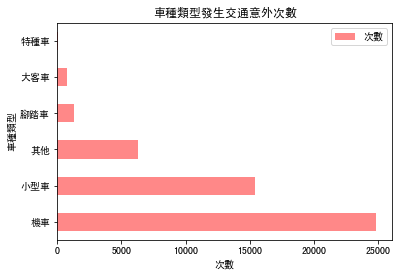

In [7]:
car_df = pd.DataFrame(tra_df["車種類"].value_counts())
car_df.columns = ["次數"]
car_ax = car_df.plot(kind="barh", title="車種類型發生交通意外次數", color='#FF8888')

car_ax.set_xlabel("次數")
car_ax.set_ylabel("車種類型")

car_df

### 統計性別發生交通意外次數

,比例
男,0.707318
女,0.292682


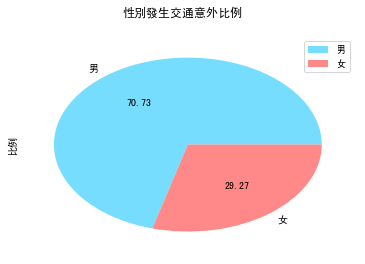

In [8]:
gender_df = pd.DataFrame(tra_df["性別"].value_counts())
gender_df.columns = ["比例"]
gender_df.index = ["男", "女"]

total_sum = gender_df["比例"].sum()
male_ratio = gender_df["比例"][0] / total_sum
female_ratio = gender_df["比例"][1] / total_sum

gender_df["比例"] = [male_ratio, female_ratio]

gender_ax = gender_df.plot.pie(title="性別發生交通意外比例", subplots=True, autopct="%.2f", colors=["#77DDFF","#FF8888"])
gender_df

### 統計各年齡層發生意外次數

,年齡組
0~10,431
11~20,6604
21~30,12074
31~40,8933
41~50,7491
51~60,7322
61~70,3965
71~80,1086
81~90,356


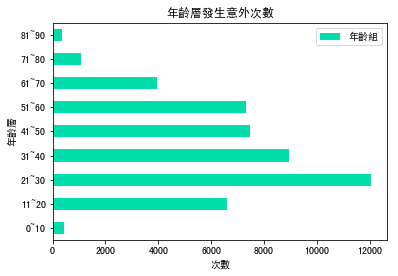

In [9]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
group_names = ["0~10", "11~20", "21~30", "31~40", "41~50", "51~60", "61~70", "71~80", "81~90"]
tra_df["年齡組"] = pd.cut(tra_df["年齡"], bins, labels=group_names)

age_g_df = pd.DataFrame(tra_df["年齡組"].value_counts())
sort_age_g_df = age_g_df.sort_index()
age_ax = sort_age_g_df.plot(kind="barh", title="年齡層發生意外次數", color="#00DDAA")

age_ax.set_xlabel("次數")
age_ax.set_ylabel("年齡層")

sort_age_g_df


### 量化非數值型別資料

In [10]:
n_tra_df = tra_df.copy()

n_tra_df["區序"] = n_tra_df["區序"].astype(str).str[:2].astype(int)

car_indexs, car_labels = pd.factorize(n_tra_df["車種類"])
n_tra_df["車種類"] = car_indexs

place_indexs, place_labels = pd.factorize(n_tra_df["肇事地點"])
n_tra_df["肇事地點"] = place_indexs

age_g_indexs, age_g_labels = pd.factorize(n_tra_df["年齡組"])
n_tra_df["年齡組"] = age_g_indexs

n_tra_df = n_tra_df.drop(["發生年", "發生月", "發生日", "發生時", "發生分", "車種", "index", "道路型態", "處理別", "當事人序", "區序", "死亡人數", "受傷人數"], axis=1)

n_tra_df.to_csv("numeric_traffict_accident.csv", encoding="utf-8")

n_tra_df.dtypes



肇事地點      int64
性別        int64
年齡      float64
受傷程度    float64
天候      float64
速限      float64
事故位置    float64
車種類       int64
年齡組       int64
dtype: object

### 計算欄位之間的相關程度

In [11]:
corr_df = n_tra_df.copy()
corr_df = corr_df.drop(["年齡組"], axis=1)

corrmat = corr_df.corr()
corrmat

,肇事地點,性別,年齡,受傷程度,天候,速限,事故位置,車種類
肇事地點,1.000000,0.009699,0.007314,-0.011744,-0.002114,-0.041926,0.120656,-0.005335
性別,0.009699,1.000000,0.001812,-0.246965,-0.004512,-0.010387,-0.002888,-0.091717
年齡,0.007314,0.001812,1.000000,0.201051,0.006985,-0.012485,0.010152,0.295184
受傷程度,-0.011744,-0.246965,0.201051,1.000000,-0.005013,0.002414,0.013453,0.547171
天候,-0.002114,-0.004512,0.006985,-0.005013,1.000000,-0.008516,-0.007608,-0.010030
速限,-0.041926,-0.010387,-0.012485,0.002414,-0.008516,1.000000,-0.033510,0.001407
事故位置,0.120656,-0.002888,0.010152,0.013453,-0.007608,-0.033510,1.000000,0.020489
車種類,-0.005335,-0.091717,0.295184,0.547171,-0.010030,0.001407,0.020489,1.000000


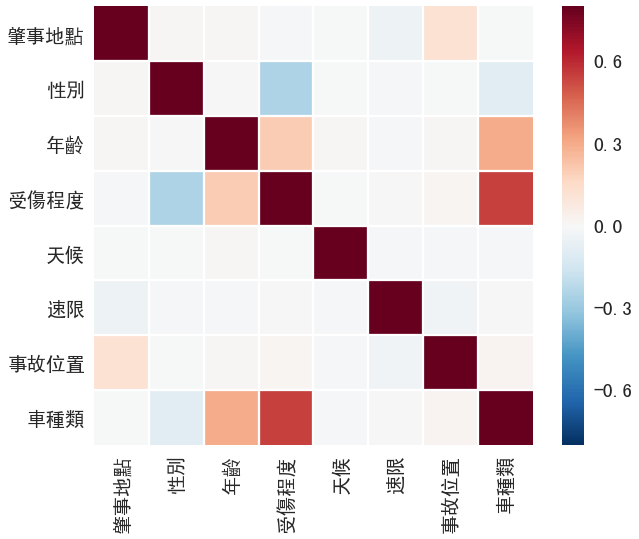

In [21]:
import seaborn as sns
import matplotlib

sns.set(context="talk", font="SimHei", font_scale=1.5)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
index_values = corrmat.columns.get_values()
for i, value in enumerate(index_values):
    if i and value != index_values[i - 1]:
        ax.axhline(len(index_values) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

## --- 資料欄位：性別、年齡、車種類，                                        Target：受傷程度 ---

### 將Data分為Training Data與Testing Data

In [13]:
tra_df_X = n_tra_df[["年齡組", "車種類", "性別"]].copy()
tra_df_y = n_tra_df[["受傷程度"]].copy()

#turning DataFrame to numpy array
tra_X = tra_df_X.as_matrix()
tra_y = tra_df_y.as_matrix()

indices = np.random.permutation(len(tra_X))

tra_X_train = tra_X[indices[:-10000]]
tra_y_train = tra_y[indices[:-10000]]
tra_X_test = tra_X[indices[-10000:]]
tra_y_test = tra_y[indices[-10000:]]


### Confusion Matrix Plot Function

In [14]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)


### 利用PCA降維

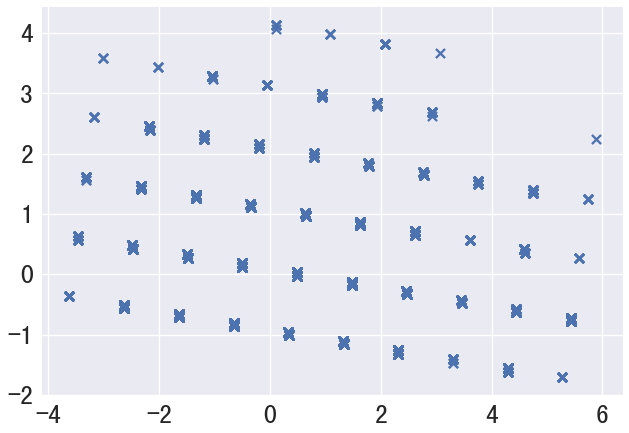

array([ 0.72287942,  0.2311982 ])

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_tra_X_train = pca.fit_transform(tra_X_train)
pca_tra_X_test = pca.fit_transform(tra_X_test)

plt.scatter(pca_tra_X_train[:, 0], pca_tra_X_train[:, 1], marker='x')
plt.show()

pca.explained_variance_ratio_


### Knn分類

0.8471


Predicted,2.0,3.0,4.0,All
Actual,,,,
1.0,17,3,0,20
2.0,5596,402,8,6006
3.0,706,2836,9,3551
4.0,204,179,39,422
5.0,0,1,0,1
All,6523,3421,56,10000


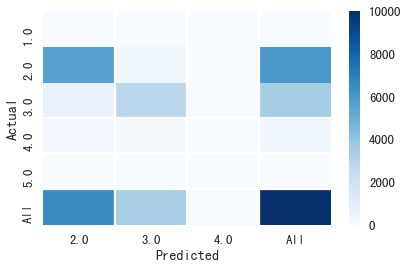

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn.fit(pca_tra_X_train, tra_y_train.ravel())

knn_predict_X = knn.predict(pca_tra_X_test)

knn_df_confusion = pd.crosstab(tra_y_test.ravel(), knn_predict_X, rownames=['Actual'], colnames=['Predicted'], margins=True)
knn_df_conf_norm = knn_df_confusion / knn_df_confusion.sum(axis=1)

knn_compared_result = np.equal(knn_predict_X, tra_y_test.ravel())

sns.set(context="talk", font="SimHei", font_scale=1)

f, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(knn_df_confusion, cmap="Blues")

index_values = knn_df_confusion.columns.get_values()
for i, value in enumerate(index_values):
    if i and value != index_values[i - 1]:
        ax.axhline(len(index_values) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

#Accuracy Rate the same as knn.score(pca_tra_X_test, tra_y_test.ravel())
knn_accuracy_rate = np.count_nonzero(knn_compared_result == True) / len(knn_compared_result)
print(knn_accuracy_rate)
knn_df_confusion


### Decision Tree分類

0.8121


Predicted,2.0,3.0,4.0,All
Actual,,,,
1.0,19,1,0,20
2.0,5821,175,10,6006
3.0,1283,2262,6,3551
4.0,231,153,38,422
5.0,1,0,0,1
All,7355,2591,54,10000


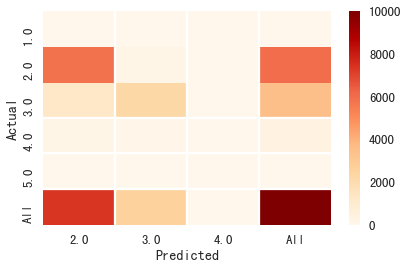

In [17]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(pca_tra_X_train, tra_y_train.ravel())

clf_predict_X = clf.predict(pca_tra_X_test)

clf_df_confusion = pd.crosstab(tra_y_test.ravel(), clf_predict_X, rownames=['Actual'], colnames=['Predicted'], margins=True)
clf_df_conf_norm = clf_df_confusion / clf_df_confusion.sum(axis=1)
clf_compared_result = np.equal(clf_predict_X, tra_y_test.ravel())

# plot_confusion_matrix(clf_df_confusion)
sns.set(context="talk", font="SimHei", font_scale=1)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Draw the heatmap using seaborn
sns.heatmap(clf_df_confusion, cmap="OrRd")

# Use matplotlib directly to emphasize known networks
index_values = clf_df_confusion.columns.get_values()
for i, value in enumerate(index_values):
    if i and value != index_values[i - 1]:
        ax.axhline(len(index_values) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

#Accuracy Rate the same as clf.score(pca_tra_X_test, tra_y_test.ravel())
clf_accuracy_rate = np.count_nonzero(clf_compared_result == True) / len(clf_compared_result)
print(clf_accuracy_rate)
clf_df_confusion
